<a href="https://colab.research.google.com/github/Esaiasson/Machine_learning_WS_2025/blob/main/Dataset_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install liac-arff

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff
from io import StringIO

The data is in the format of a .arfff file. To process this format, the library liac-arff is used.


In [23]:
with open('depression_data.arff', 'r', encoding='utf-8') as f:
    datafile = arff.load(f)

df = pd.DataFrame(datafile['data'], columns=[attr[0] for attr in datafile['attributes']])

df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


The dataset contains 27901 records, and 17 attributes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

The categorical attributes was imported with the datatype object, below they are converted to the category datatype.


In [25]:
cat_columns = ["Gender", "Profession", "City", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness", "Depression"]

for col in cat_columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  float64 
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  float64 
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

<Figure size 1200x600 with 0 Axes>

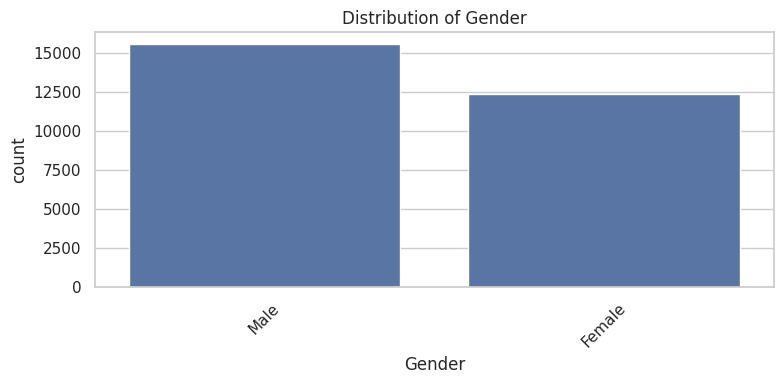

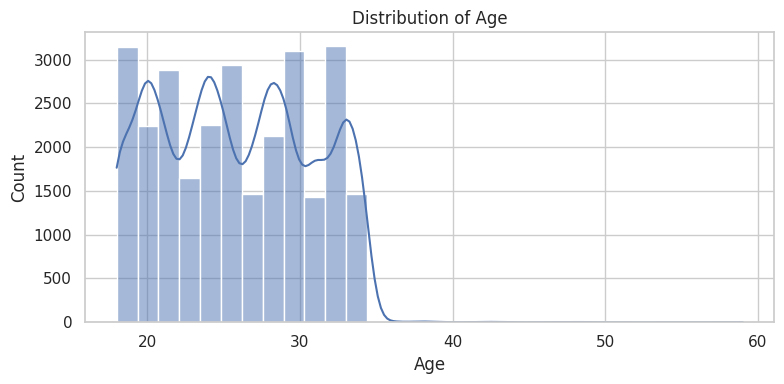

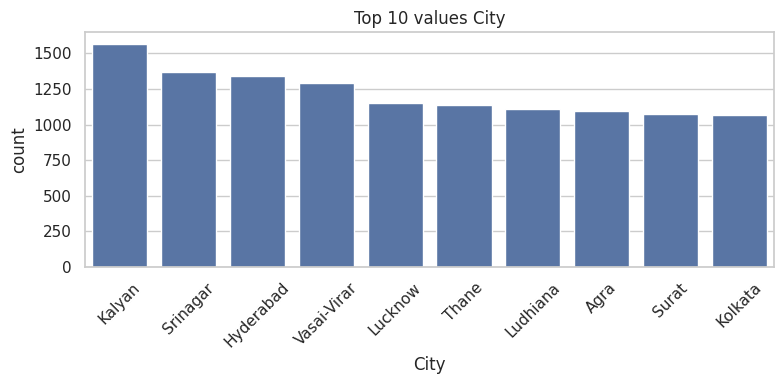

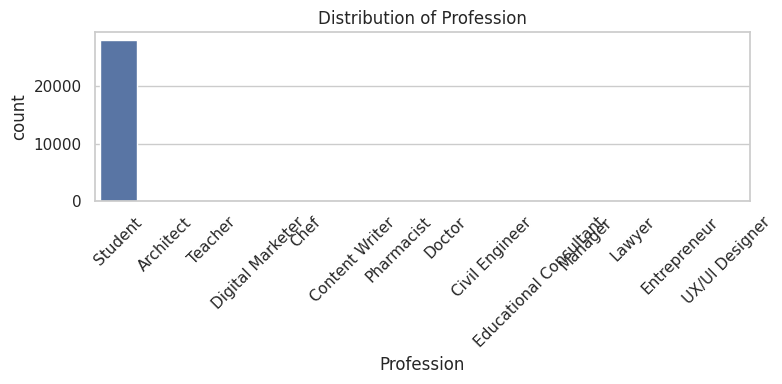

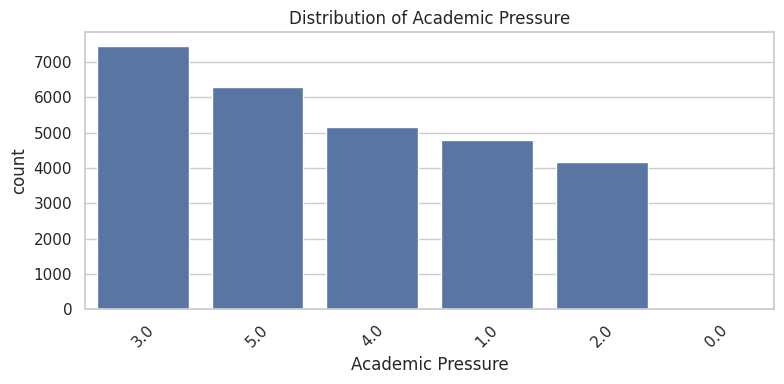

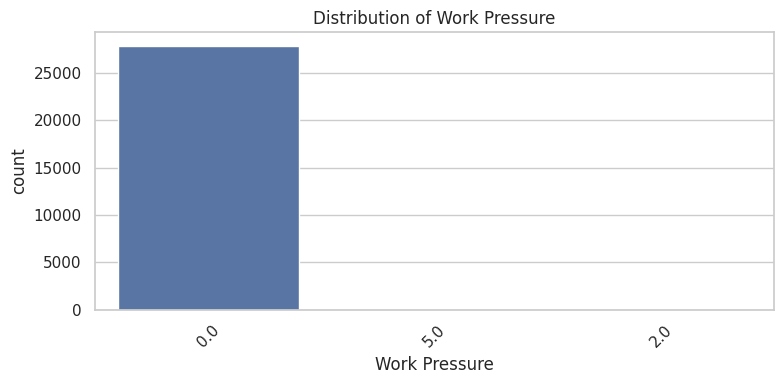

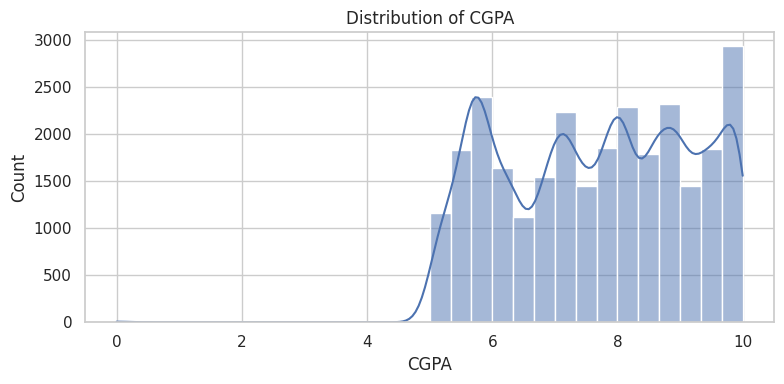

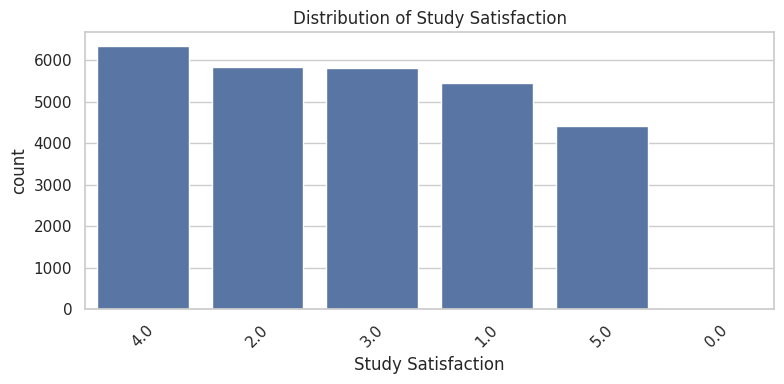

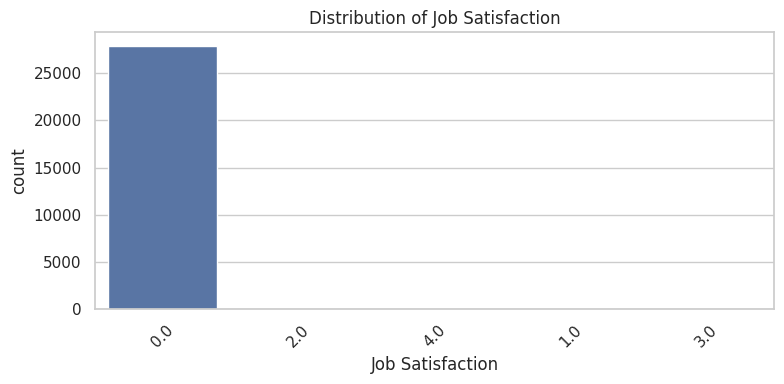

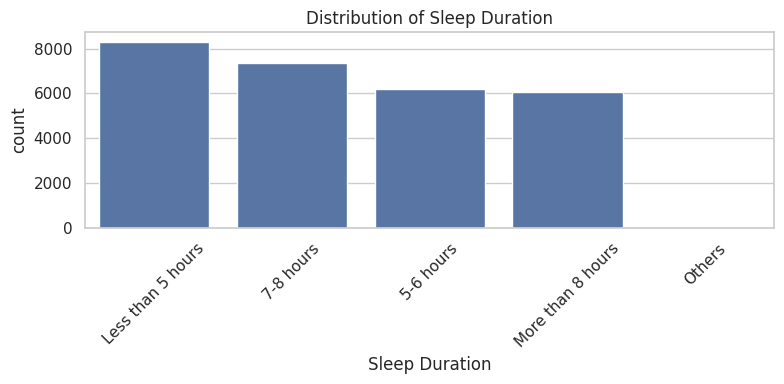

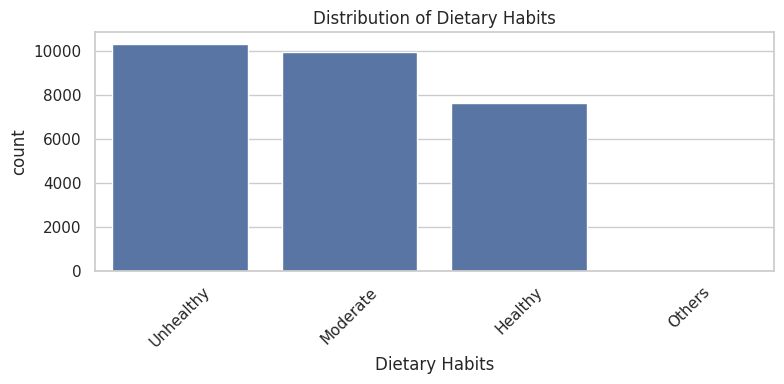

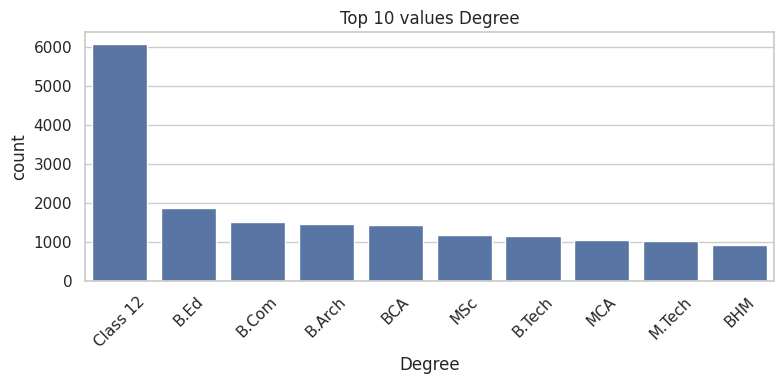

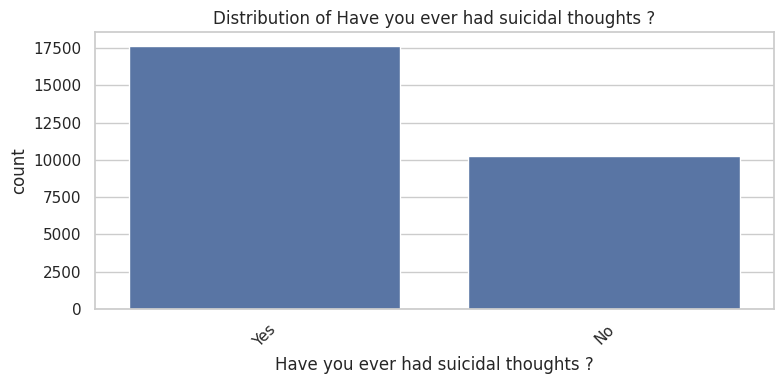

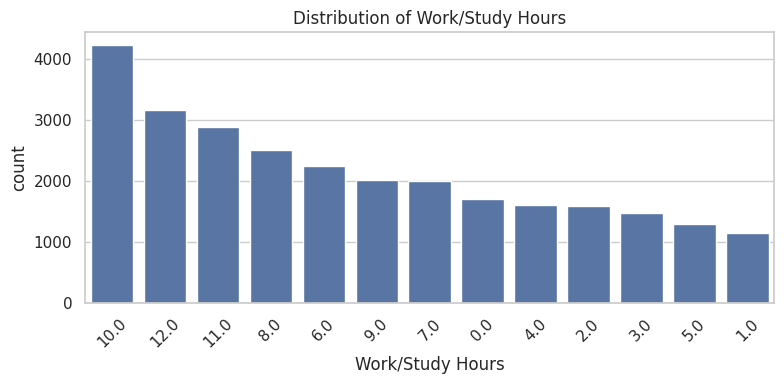

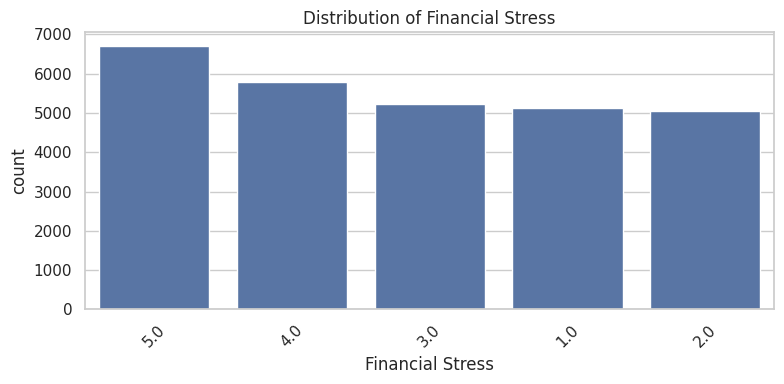

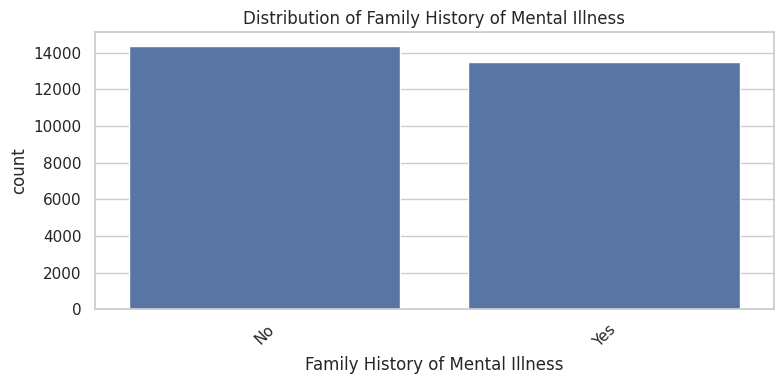

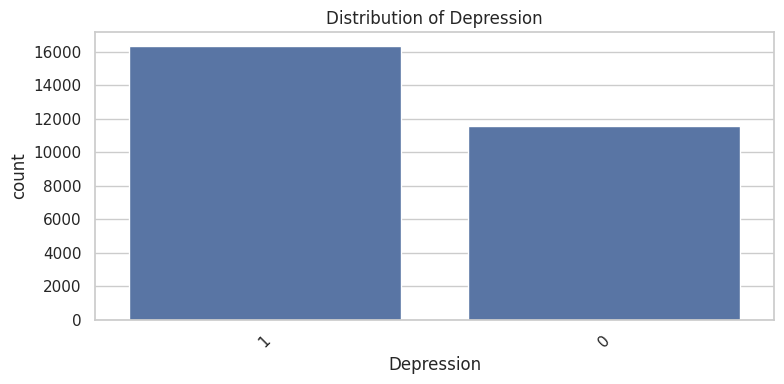

In [37]:
# features and target distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for col in df.columns:
    plt.figure(figsize=(8, 4))

    if df[col].dtype == 'category' or df[col].nunique() < 15:
        if col == "City" or col == "Degree":
          sns.countplot(x=col, data=df, order=df[col].value_counts().iloc[:10].index)
          plt.title(f'Top 10 values {col}')
          plt.xticks(rotation=45)
        else:
          sns.countplot(x=col, data=df, order=df[col].value_counts().index)
          plt.title(f'Distribution of {col}')
          plt.xticks(rotation=45)
    else:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()




Some valuable information that can be derived from these plots are that the attributes "Job Satisfaction" and "Work Pressure" contains no other values then 0. The same applies to the attribute "Profession", where the only value pressent in the data is "Student". It could make sense to keep these attributes if the data would be used to create models, in later stages, that predicts depression in people in general. That would however mean that this data is heavily biased towards students and not very usefull by itself. If instead we decide to only model depression in the specific group of students, then the data is not biased in the same way, and removing the attributes is the most reasonable. We will therefore proced with removing theses attributes, and only create models for students with the data.  


In [41]:
df = df.drop(['Job Satisfaction', 'Work Pressure', 'Profession'], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
